### OLS Regression Exercise: Divvy Dataset

This was a dataset found on Kaggle and describes the data surrounding __[the Chicago Divvy Bikeshare.](https://www.kaggle.com/yingwurenjian/chicago-divvy-bicycle-sharing-data)__ 

I figured it would be interesting to start by seeing how the temperature effected the number of bikeshare transactions as well as the trip duration.  Weather would be another interesting element to dig into, but that would fall outside of our current regression discussion.

In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split, cross_val_score
pd.options.display.float_format = '{:.3f}'.format

import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

%matplotlib inline

/usr/local/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


In [2]:
# Importing and isolating the data:

raw_data = pd.read_csv("Divvy_BikeShare.csv")
data = pd.DataFrame()
data = pd.DataFrame(raw_data[['trip_id', 'year', 'month', 'day', 'gender', 
                              'tripduration', 'temperature', 'events']])
data.groupby('year').count()

,trip_id,month,day,gender,tripduration,temperature,events
year,,,,,,,
2014,1615683,1615683,1615683,1615683,1615683,1615683,1615683
2015,2220509,2220509,2220509,2220509,2220509,2220509,2220509
2016,2701353,2701353,2701353,2701353,2701353,2701353,2701353
2017,2957690,2957690,2957690,2957690,2957690,2957690,2957690


In [3]:
# Creating some new columns to aid in feature engineering:

year_1 = 2014
year_2 = 2015
year_3 = 2016
year_4 = 2017

data.loc[data['year'] == year_1, 'yr_total'] = data.loc[data['year'] == year_1].trip_id.count()
data.loc[data['year'] == year_2, 'yr_total'] = data.loc[data['year'] == year_2].trip_id.count()
data.loc[data['year'] == year_3, 'yr_total'] = data.loc[data['year'] == year_3].trip_id.count()
data.loc[data['year'] == year_4, 'yr_total'] = data.loc[data['year'] == year_4].trip_id.count()

In [4]:
# Further isolation to investigate feature engineering and see what the data looks like:

mth_day = data.groupby(['month', 'day']).transform('count')

In [5]:
monthly_df = data.groupby('month', as_index = False).agg({'tripduration': ['mean', 'std', 'median'],
                                                           'temperature': ['mean', 'std', 'median'],
                                                           'trip_id':'count',
                                                           'day': ['mean', 'median']})
monthly_df
data.groupby('temperature').agg('count')

,trip_id,year,month,day,gender,tripduration,events,yr_total
temperature,,,,,,,,
-15.000,1,1,1,1,1,1,1,1
-11.900,5,5,5,5,5,5,5,5
-11.000,25,25,25,25,25,25,25,25
-9.900,46,46,46,46,46,46,46,46
-8.000,114,114,114,114,114,114,114,114
-7.100,170,170,170,170,170,170,170,170
-6.000,424,424,424,424,424,424,424,424
-5.100,242,242,242,242,242,242,242,242
-4.000,281,281,281,281,281,281,281,281


## Model #1:

Here, I looked at temperature and tripduration within the whole dataset.  This, in comparison with the KNN regression model, took a relatively short time to run and was more efficient computationally. It seems as if it is less prone to over-fitting than the KNN model (if I am understanding things correctly). As a result, it would give a very general and broad idea of any trends within the data.

In [6]:
# Fitting the model:

regr = linear_model.LinearRegression()

x = pd.DataFrame(data['temperature'])
y = pd.DataFrame(data['tripduration'])
                 
regr.fit(x, y)

# Looking at Coefficients/Intercept:

print("The Coefficient is {}. \n".format(regr.coef_))
print("The Intercept is {}. \n".format(regr.intercept_))

cross_val_score(regr, x, y, cv = 10)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/base.py:435: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


The Coefficient is [[0.05514151]]. 

The Intercept is [7.9729518]. 



array([0.01373192, 0.02163564, 0.0089961 , 0.01252493, 0.02554136,
       0.00111414, 0.01690637, 0.02461039, 0.00327847, 0.02209283])

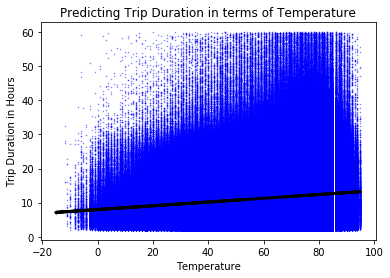

In [7]:
plt.scatter(x, y, color='b', s = .25, alpha = .5)
plt.plot(x, regr.predict(x), color='black', linewidth=3)
plt.xlabel("Temperature")
plt.ylabel("Trip Duration in Hours")
plt.title("Predicting Trip Duration in terms of Temperature")
plt.show()

The validation scores are not great at all, but in the least, they are consistent.  I imagine the amount of variability and the size of the dataset itself are creating these characteristics. If so, limiting extreme trip lengths and temperatures would hopefully increase your accuracy. 

### Model #2:

Here, I tried to limit the trip duration to only those larger than 10 hours.  This gave some similar results, but the differences are discussed below:

In [8]:
triponi = data.loc[data['tripduration'] >= 10]

In [9]:
x1 = pd.DataFrame(triponi['temperature'])
y1 = pd.DataFrame(triponi['tripduration'])

In [10]:
regr1 = linear_model.LinearRegression()

regr1.fit(x1, y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
print("The Coefficient is {}. The Intercept is {}.".format(regr1.coef_, regr1.intercept_))

The Coefficient is [[0.03544439]]. The Intercept is [14.8652428].


Based on the coefficient and intercept scores, looks like the increase in higher trip duration during higher
temperatures is less compared to trips of all lengths. It does have a higher starting threshhold, however (i.e.
a higher intercept).  

It would be interesting to isolate some more of the data here (perhaps limiting the trip duration to only an hour, three hours, etc.  Limiting this my the months as well as weather events could perhaps reveal some more trends as well.  

Regarding this model, it seems as if it does not describe the larger increase in trip duration that is seen in the scatter plot.  However, this could mean that there are more instances of shorter-term trips which are over-ruling the longer-term outliers within the dataset.  In that case, this model could be useful in looking at trends from a global perspective. If you wanted to get a more detailed look, you would probably want to start by limiting your initial dataset, i.e. restricting the temperature range and looking at trips of only a certain length.

The cross-validation scores are not better than those above, perhaps because there is an increase in variability with trips that are more than 10 hours. Limiting the dataset further would hopefully increase accuracy. 

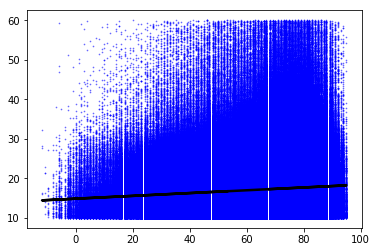

In [12]:
plt.scatter(x1, y1, c = 'b', s = .5, alpha = .5)
plt.plot(x1, regr1.predict(x1), color = 'black', linewidth = 2.5)

In [13]:
cross_val_score(regr1, x1, y1, cv = 10)

array([0.00715079, 0.01075433, 0.00543886, 0.00599938, 0.01347858,
       0.00079435, 0.00805918, 0.00978284, 0.00193919, 0.00916867])

### Model 3: Trying to limit the data a bit more:

This is also where I realized how I had forgotten to engineer my own feature to serve as the target values instead of simply entering another column of the data frame.     .......  This would explain the better accuracy scores. 
         :|

In [14]:
data.tripduration.describe()

count   9495235.000
mean         11.447
std           7.206
min           2.000
25%           6.033
50%           9.633
75%          15.200
max          60.000
Name: tripduration, dtype: float64

In [15]:
# Limiting the data to January-like temperatures - and limiting the trip duration to 1-3 hours:

trial = pd.DataFrame(data.loc[(data['tripduration'] <= 3) & (data['tripduration'] >= 0) &
         (data['temperature'] <= 40) & (data['temperature'] >= 20)])

temp = trial.groupby('temperature').transform('count')

trial['temp_count'] = temp['trip_id']
trial['temp_percent'] = trial['temp_count'] / 54404

# x = data[['temperature', 'tripduration']]
# y = data['temp_percent']

In [16]:
beta = trial.groupby('temperature').count()


trial.loc[trial['temperature'] == 21.0].head()

,trip_id,year,month,day,gender,tripduration,temperature,events,yr_total,temp_count,temp_percent
484176,1292408,2014,3,2,Male,2.067,21.000,clear,1615683.000,838,0.015
488339,1285480,2014,3,0,Male,2.883,21.000,cloudy,1615683.000,838,0.015
488342,1285476,2014,3,0,Male,2.233,21.000,cloudy,1615683.000,838,0.015
488383,1285352,2014,3,6,Female,2.850,21.000,cloudy,1615683.000,838,0.015
504174,1255955,2014,3,6,Male,2.683,21.000,cloudy,1615683.000,838,0.015


In [17]:
regr_3 = linear_model.LinearRegression()

x2 = pd.DataFrame(trial.temperature)
y2 = pd.DataFrame(trial.temp_percent)


In [18]:
regr_3.fit(x2, y2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
print("The Coefficient is {}. The Intercept is {}.".format(regr_3.coef_, regr_3.intercept_))

cross_val_score(regr_3, x2, y2, cv = 10)

The Coefficient is [[0.00317766]]. The Intercept is [-0.04817376].


array([0.40953524, 0.80283351, 0.78333212, 0.30577626, 0.78904574,
       0.87858005, 0.61826993, 0.79263201, 0.79771369, 0.70544065])

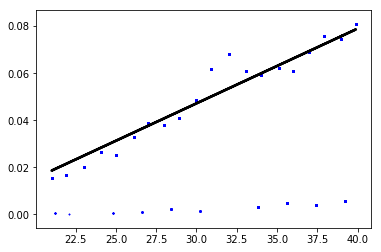

In [20]:
plt.scatter(x2, y2, c = 'b', s = .5, alpha = .5)
plt.plot(x2, regr_3.predict(x2), color = 'black', linewidth = 2.5)

Welp. That looks enormously better. Moving onto the KNN.

### Multi-Variable Regression with the same data-set:

In [51]:
regr_beta = linear_model.LinearRegression()

In [61]:
yr_1 = pd.DataFrame(data.loc[data['year'] == 2014])

In [62]:
yr_1['temperature2'] = yr_1['temperature']

In [63]:
beta = data.groupby('temperature', as_index = False).transform('count')


In [69]:
beta['temp_count'] = beta['trip_id']
beta['temp_pct'] = beta['temp_count'] / 1615683

In [70]:
X1 = beta[['temperature2', 'tripduration']]
Y1 = beta['temp_pct']

In [71]:
regr_beta.fit(X1, Y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [72]:
print("The Coefficient is {}. The Intercept is {}.".format(regr_beta.coef_, regr_beta.intercept_))

The Coefficient is [-6.18920557e-07  1.23785385e-06]. The Intercept is 1.3877787807814457e-17.


In [73]:
cross_val_score(regr_beta, X1, Y1, cv = 10)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])